In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
import numpy as np
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
df = spark.read.csv('pessoas_2015-2021.csv', header=True, inferSchema=True, sep=';')

In [ ]:
df.show(n=10, truncate=False)

In [ ]:
df = df.drop_duplicates()
df.show(n=10, truncate=False)

In [ ]:
df = df.drop('grau_de_instrucao','nacionalidade','ano_mes_obito')

In [ ]:
df = df.na.fill("Não informado",subset = ['tipo_de_vitima']) \
    .na.fill('Não informado',subset = ['profissao']) \
    .na.fill('Não informado',subset = ['local_obito'])

In [ ]:
df.withColumn('idade', df['idade'].cast('string'))
df.withColumn('ano_obito', df['ano_obito'].cast('string'))
df.withColumn('data_obito', df['data_obito'].cast('string'))
df.withColumn('mes_obito', df['mes_obito'].cast('string'))
df.withColumn('dia_obito', df['dia_obito'].cast('string'))
df.withColumn('id_veiculo', df['id_veiculo'].cast('string'))
df.withColumn('tempo_sinistro_obito', df['tempo_sinistro_obito'].cast('int'))

In [ ]:
df = df.na.fill("Não informado",subset = ['idade']) \
    .na.fill('Não informado',subset = ['ano_obito']) \
    .na.fill('Não informado',subset = ['data_obito']) \
    .na.fill('Não informado',subset = ['mes_obito']) \
    .na.fill('Não informado',subset = ['dia_obito']) \
    .na.fill('Não informado',subset = ['id_veiculo']) \
    .na.fill("",subset = ['tipo_veiculo_vitima']) \
    .na.fill(0,subset= ['tempo_sinistro_obito'])

In [ ]:
df.show(n=10, truncate=False)

In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType

def faixa_idade_func(idade):
    if idade is None:
        return None
    if 1 <= idade < 15:
        return 'Adolescente'
    elif 15 <= idade < 25:
        return 'Jovem'
    elif 25 <= idade < 60:
        return 'Adulto'
    else:
        return 'Idoso'


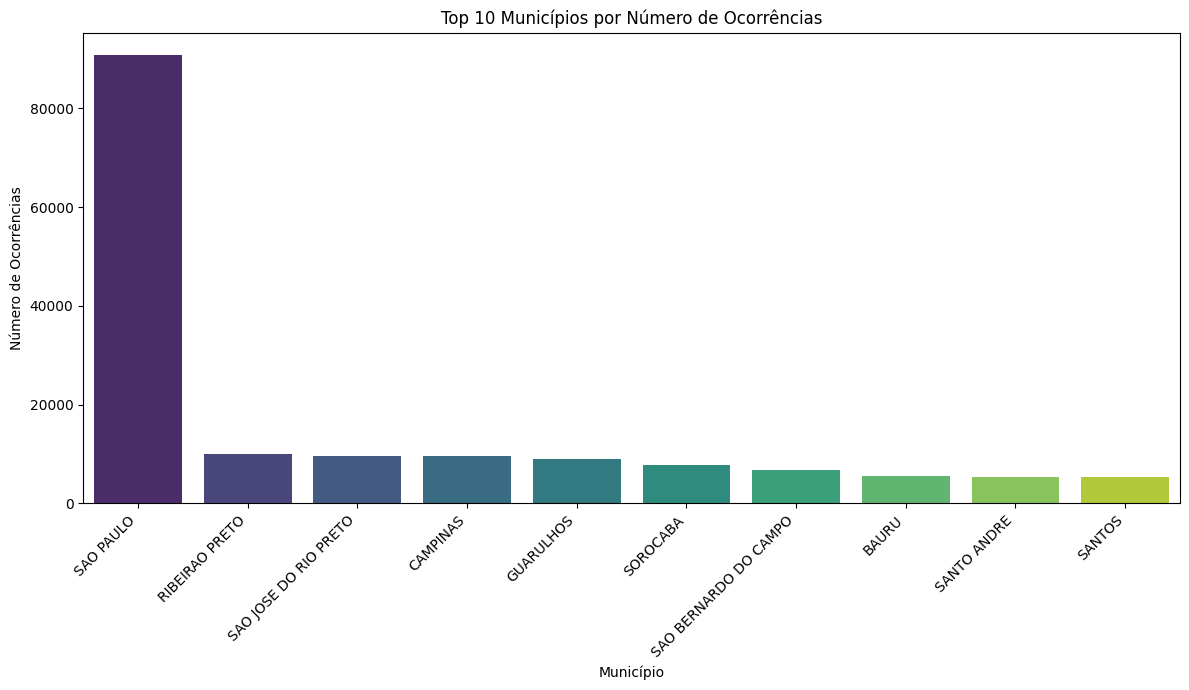

In [ ]:
plt.figure(figsize=(12, 7))

municipio_counts_spark = df.groupBy('municipio').count()

top_n_municipalities = municipio_counts_spark.orderBy(col('count').desc()).limit(10)

municipio_counts_pandas = top_n_municipalities.toPandas()

sns.barplot(x='municipio', y='count', hue='municipio', data=municipio_counts_pandas, palette='viridis', legend=False)

plt.title('Top 10 Municípios por Número de Ocorrências')
plt.xlabel('Município')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

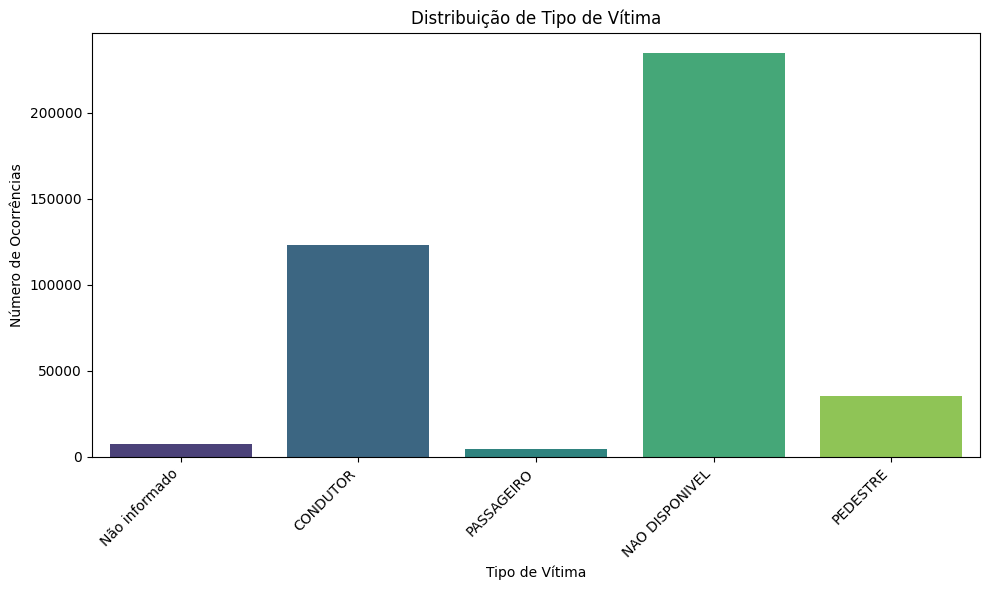

In [ ]:
plt.figure(figsize=(10, 6))


tipo_de_vitima_counts_spark = df.groupBy('tipo_de_vitima').count()

tipo_de_vitima_counts_pandas = tipo_de_vitima_counts_spark.toPandas()

sns.barplot(x='tipo_de_vitima', y='count', hue='tipo_de_vitima', data=tipo_de_vitima_counts_pandas, palette='viridis', legend=False)

plt.title('Distribuição de Tipo de Vítima')
plt.xlabel('Tipo de Vítima')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

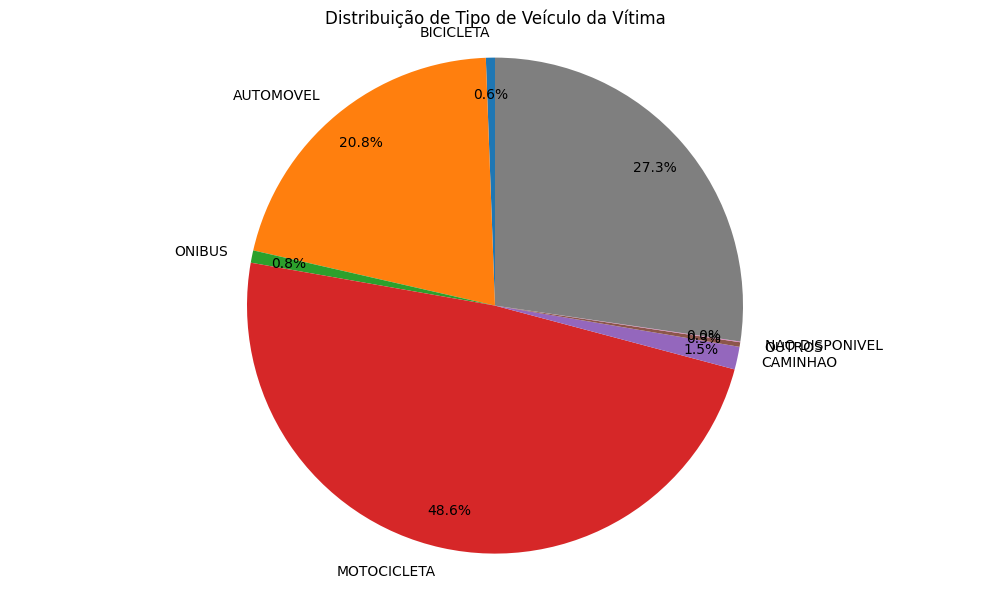

In [ ]:
plt.figure(figsize=(10, 6))


tipo_veiculo_counts_spark = df.groupBy('tipo_veiculo_vitima').count()

tipo_veiculo_counts_pandas = tipo_veiculo_counts_spark.toPandas()

labels = tipo_veiculo_counts_pandas['tipo_veiculo_vitima']
sizes = tipo_veiculo_counts_pandas['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de Tipo de Veículo da Vítima')
plt.axis('equal')
plt.tight_layout()
plt.show()